# Phase 3: Feature Engineering

**Project**: Steel Plates Fault Detection  
**Dataset**: Steel Plates Fault Dataset  
**Purpose**: Create new features to improve model performance  
**Date**: December 2024

---

## Overview

Feature engineering is the process of creating new features from existing data to improve model performance.

This notebook covers:
1. Understanding existing features
2. Creating geometric features
3. Creating statistical features
4. Creating ratio-based features
5. Feature selection
6. Saving engineered features

---

## Why Feature Engineering?

> "Coming up with features is difficult, time-consuming, requires expert knowledge. Applied machine learning is basically feature engineering." — Andrew Ng

Good features can:
- ✅ Improve model accuracy significantly
- ✅ Reduce model complexity
- ✅ Make models more interpretable
- ✅ Capture domain knowledge

---

## Table of Contents

1. [Setup and Data Loading](#1-setup-and-data-loading)
2. [Understanding Existing Features](#2-understanding-existing-features)
3. [Geometric Features](#3-geometric-features)
4. [Statistical Features](#4-statistical-features)
5. [Ratio-Based Features](#5-ratio-based-features)
6. [Interaction Features](#6-interaction-features)
7. [Feature Selection](#7-feature-selection)
8. [Save Engineered Features](#8-save-engineered-features)
9. [Summary](#9-summary)

---
## 1. Setup and Data Loading

Import libraries and load the preprocessed data.

In [1]:
# ============================================================
# LIBRARY IMPORTS
# ============================================================

# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')
sns.set_palette('husl')

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [2]:
# Load the raw data
# We start from raw data to have full control over feature engineering
data_path = '../data/raw/steel_plates_fault.csv'
df = pd.read_csv(data_path)

# Store original info
original_features = df.columns.tolist()
original_shape = df.shape

print("✓ Dataset loaded successfully!")
print(f"\n📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Separate features and target
feature_cols = [col for col in df.columns if col != 'Class']
target_col = 'Class'

print(f"\n📋 Original features: {len(feature_cols)}")
print(f"🎯 Target: '{target_col}' with {df[target_col].nunique()} classes")

df.head()

✓ Dataset loaded successfully!

📊 Dataset Shape: 1,941 rows × 28 columns

📋 Original features: 27
🎯 Target: 'Class' with 7 classes


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


---
## 2. Understanding Existing Features

Before creating new features, let's understand what we have.

### Feature Groups in Steel Plates Dataset:

| Group | Features | Description |
|-------|----------|-------------|
| **Location** | X_Minimum, X_Maximum, Y_Minimum, Y_Maximum | Fault coordinates |
| **Size** | Pixels_Areas, X_Perimeter, Y_Perimeter | Fault dimensions |
| **Luminosity** | Sum_of_Luminosity, Min_of_Luminosity, Max_of_Luminosity | Brightness |
| **Steel Type** | TypeOfSteel_A300, TypeOfSteel_A400 | Material type |
| **Shape Indices** | Edges_Index, Empty_Index, Square_Index, etc. | Shape metrics |

In [3]:
# Analyze feature groups
print("📊 Feature Analysis:\n")

# Group features by type
location_features = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum']
size_features = ['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter']
luminosity_features = [col for col in feature_cols if 'Luminosity' in col]
steel_features = [col for col in feature_cols if 'TypeOfSteel' in col]
index_features = [col for col in feature_cols if 'Index' in col]

print(f"   Location features:   {len(location_features)}")
print(f"   Size features:       {len(size_features)}")
print(f"   Luminosity features: {len(luminosity_features)}")
print(f"   Steel type features: {len(steel_features)}")
print(f"   Index features:      {len(index_features)}")

# Check for available features
print("\n📋 Available features:")
for i, col in enumerate(feature_cols, 1):
    print(f"   {i:2}. {col}")

📊 Feature Analysis:

   Location features:   4
   Size features:       3
   Luminosity features: 4
   Steel type features: 2
   Index features:      11

📋 Available features:
    1. X_Minimum
    2. X_Maximum
    3. Y_Minimum
    4. Y_Maximum
    5. Pixels_Areas
    6. X_Perimeter
    7. Y_Perimeter
    8. Sum_of_Luminosity
    9. Minimum_of_Luminosity
   10. Maximum_of_Luminosity
   11. Length_of_Conveyer
   12. TypeOfSteel_A300
   13. TypeOfSteel_A400
   14. Steel_Plate_Thickness
   15. Edges_Index
   16. Empty_Index
   17. Square_Index
   18. Outside_X_Index
   19. Edges_X_Index
   20. Edges_Y_Index
   21. Outside_Global_Index
   22. LogOfAreas
   23. Log_X_Index
   24. Log_Y_Index
   25. Orientation_Index
   26. Luminosity_Index
   27. SigmoidOfAreas


---
## 3. Geometric Features

Create features based on the geometry of the fault region.

**Ideas:**
- **Width**: X_Maximum - X_Minimum
- **Height**: Y_Maximum - Y_Minimum  
- **Aspect Ratio**: Width / Height
- **Area from coordinates**: Width × Height
- **Center coordinates**: Midpoint of fault region

In [4]:
# ============================================================
# CREATE GEOMETRIC FEATURES
# ============================================================

print("🔧 Creating Geometric Features:\n")

# Create a copy for feature engineering
df_eng = df.copy()

# 1. Width: Horizontal extent of the fault
df_eng['Width'] = df_eng['X_Maximum'] - df_eng['X_Minimum']
print("   ✓ Created: Width = X_Maximum - X_Minimum")

# 2. Height: Vertical extent of the fault
df_eng['Height'] = df_eng['Y_Maximum'] - df_eng['Y_Minimum']
print("   ✓ Created: Height = Y_Maximum - Y_Minimum")

# 3. Aspect Ratio: Shape indicator (wide vs tall)
# Add small value to avoid division by zero
df_eng['Aspect_Ratio'] = df_eng['Width'] / (df_eng['Height'] + 1)
print("   ✓ Created: Aspect_Ratio = Width / Height")

# 4. Bounding Box Area: Total area of fault region
df_eng['BBox_Area'] = df_eng['Width'] * df_eng['Height']
print("   ✓ Created: BBox_Area = Width × Height")

# 5. Center X: Horizontal center of fault
df_eng['Center_X'] = (df_eng['X_Maximum'] + df_eng['X_Minimum']) / 2
print("   ✓ Created: Center_X = (X_Max + X_Min) / 2")

# 6. Center Y: Vertical center of fault
df_eng['Center_Y'] = (df_eng['Y_Maximum'] + df_eng['Y_Minimum']) / 2
print("   ✓ Created: Center_Y = (Y_Max + Y_Min) / 2")

# 7. Perimeter from coordinates
df_eng['BBox_Perimeter'] = 2 * (df_eng['Width'] + df_eng['Height'])
print("   ✓ Created: BBox_Perimeter = 2 × (Width + Height)")

# Summary
new_geo_features = ['Width', 'Height', 'Aspect_Ratio', 'BBox_Area', 'Center_X', 'Center_Y', 'BBox_Perimeter']
print(f"\n📊 Created {len(new_geo_features)} geometric features")

🔧 Creating Geometric Features:

   ✓ Created: Width = X_Maximum - X_Minimum
   ✓ Created: Height = Y_Maximum - Y_Minimum
   ✓ Created: Aspect_Ratio = Width / Height
   ✓ Created: BBox_Area = Width × Height
   ✓ Created: Center_X = (X_Max + X_Min) / 2
   ✓ Created: Center_Y = (Y_Max + Y_Min) / 2
   ✓ Created: BBox_Perimeter = 2 × (Width + Height)

📊 Created 7 geometric features


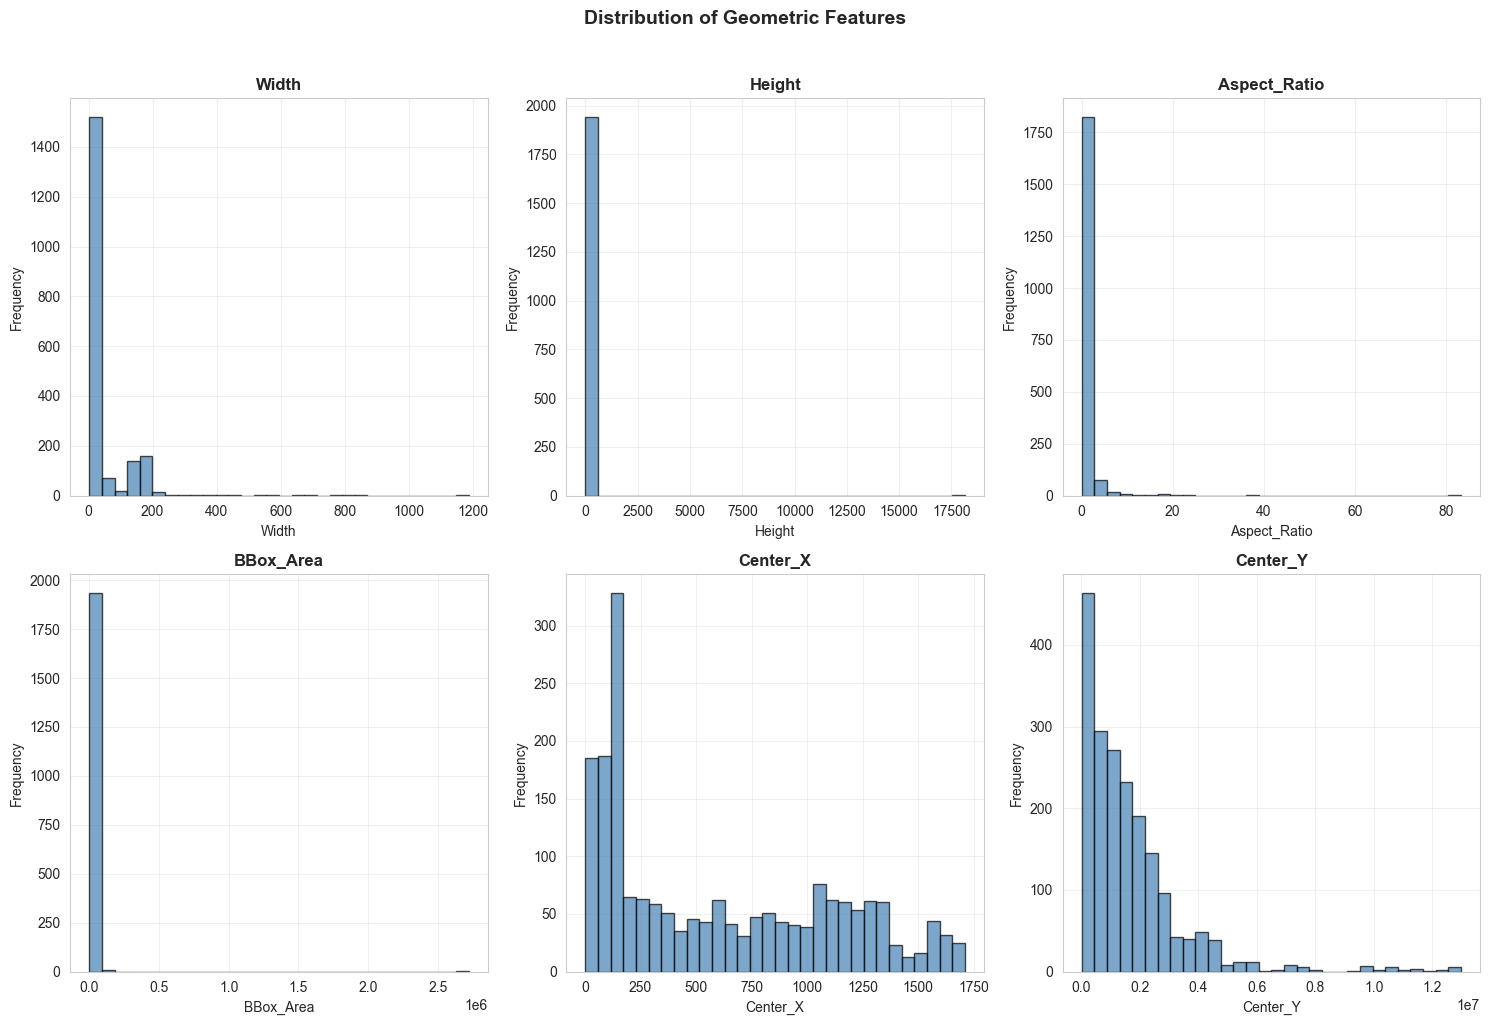

💡 These features capture the shape and position of faults


In [5]:
# Visualize geometric features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(new_geo_features[:6]):
    axes[idx].hist(df_eng[feature], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Distribution of Geometric Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("💡 These features capture the shape and position of faults")

---
## 4. Statistical Features

Create features based on statistical properties of existing features.

**Ideas:**
- **Luminosity Range**: Max - Min luminosity
- **Average Luminosity**: Per pixel luminosity
- **Luminosity Variance**: Spread of brightness values

In [6]:
# ============================================================
# CREATE STATISTICAL FEATURES
# ============================================================

print("🔧 Creating Statistical Features:\n")

# 1. Luminosity Range: Contrast indicator
df_eng['Luminosity_Range'] = df_eng['Maximum_of_Luminosity'] - df_eng['Minimum_of_Luminosity']
print("   ✓ Created: Luminosity_Range = Max - Min Luminosity")

# 2. Average Luminosity: Per-pixel brightness
df_eng['Avg_Luminosity'] = df_eng['Sum_of_Luminosity'] / (df_eng['Pixels_Areas'] + 1)
print("   ✓ Created: Avg_Luminosity = Sum / Pixels")

# 3. Luminosity Density: How bright per unit area
df_eng['Luminosity_Density'] = df_eng['Sum_of_Luminosity'] / (df_eng['BBox_Area'] + 1)
print("   ✓ Created: Luminosity_Density = Sum / BBox_Area")

# 4. Pixel Density: How filled is the bounding box
df_eng['Pixel_Density'] = df_eng['Pixels_Areas'] / (df_eng['BBox_Area'] + 1)
print("   ✓ Created: Pixel_Density = Pixels / BBox_Area")

# 5. Perimeter Efficiency: Actual vs bounding box perimeter
if 'X_Perimeter' in df_eng.columns and 'Y_Perimeter' in df_eng.columns:
    df_eng['Perimeter_Total'] = df_eng['X_Perimeter'] + df_eng['Y_Perimeter']
    df_eng['Perimeter_Efficiency'] = df_eng['Perimeter_Total'] / (df_eng['BBox_Perimeter'] + 1)
    print("   ✓ Created: Perimeter_Total and Perimeter_Efficiency")

# Summary
new_stat_features = ['Luminosity_Range', 'Avg_Luminosity', 'Luminosity_Density', 
                     'Pixel_Density', 'Perimeter_Total', 'Perimeter_Efficiency']
print(f"\n📊 Created {len(new_stat_features)} statistical features")

🔧 Creating Statistical Features:

   ✓ Created: Luminosity_Range = Max - Min Luminosity
   ✓ Created: Avg_Luminosity = Sum / Pixels
   ✓ Created: Luminosity_Density = Sum / BBox_Area
   ✓ Created: Pixel_Density = Pixels / BBox_Area
   ✓ Created: Perimeter_Total and Perimeter_Efficiency

📊 Created 6 statistical features


---
## 5. Ratio-Based Features

Create features as ratios between existing features. Ratios are often more robust than raw values.

In [7]:
# ============================================================
# CREATE RATIO-BASED FEATURES
# ============================================================

print("🔧 Creating Ratio-Based Features:\n")

# 1. Area to Perimeter Ratio: Shape compactness
df_eng['Area_Perimeter_Ratio'] = df_eng['Pixels_Areas'] / (df_eng['Perimeter_Total'] + 1)
print("   ✓ Created: Area_Perimeter_Ratio")

# 2. X to Y Perimeter Ratio: Horizontal vs vertical complexity
df_eng['XY_Perimeter_Ratio'] = df_eng['X_Perimeter'] / (df_eng['Y_Perimeter'] + 1)
print("   ✓ Created: XY_Perimeter_Ratio")

# 3. Compactness: How circular/square is the shape
# Compactness = 4π × Area / Perimeter²
df_eng['Compactness'] = (4 * np.pi * df_eng['Pixels_Areas']) / (df_eng['Perimeter_Total'] ** 2 + 1)
print("   ✓ Created: Compactness (circularity measure)")

# 4. Extent: Ratio of pixels to bounding box area
df_eng['Extent'] = df_eng['Pixels_Areas'] / (df_eng['BBox_Area'] + 1)
print("   ✓ Created: Extent = Pixels / BBox_Area")

# 5. Solidity approximation (using available features)
if 'Empty_Index' in df_eng.columns:
    df_eng['Solidity'] = 1 - df_eng['Empty_Index']
    print("   ✓ Created: Solidity = 1 - Empty_Index")

# Summary
new_ratio_features = ['Area_Perimeter_Ratio', 'XY_Perimeter_Ratio', 'Compactness', 'Extent', 'Solidity']
print(f"\n📊 Created {len(new_ratio_features)} ratio-based features")

🔧 Creating Ratio-Based Features:

   ✓ Created: Area_Perimeter_Ratio
   ✓ Created: XY_Perimeter_Ratio
   ✓ Created: Compactness (circularity measure)
   ✓ Created: Extent = Pixels / BBox_Area
   ✓ Created: Solidity = 1 - Empty_Index

📊 Created 5 ratio-based features


---
## 6. Interaction Features

Create features that capture interactions between different feature groups.

In [8]:
# ============================================================
# CREATE INTERACTION FEATURES
# ============================================================

print("🔧 Creating Interaction Features:\n")

# 1. Size × Luminosity interaction
df_eng['Size_Luminosity'] = df_eng['Pixels_Areas'] * df_eng['Avg_Luminosity']
print("   ✓ Created: Size_Luminosity = Pixels × Avg_Luminosity")

# 2. Position-based features
df_eng['Position_Score'] = df_eng['Center_X'] * df_eng['Center_Y'] / 1e6
print("   ✓ Created: Position_Score")

# 3. Shape complexity score
if 'Edges_Index' in df_eng.columns:
    df_eng['Shape_Complexity'] = df_eng['Edges_Index'] * df_eng['Perimeter_Total']
    print("   ✓ Created: Shape_Complexity")

# 4. Steel type interaction with size
if 'TypeOfSteel_A300' in df_eng.columns:
    df_eng['Steel_Size_A300'] = df_eng['TypeOfSteel_A300'] * df_eng['Pixels_Areas']
    df_eng['Steel_Size_A400'] = df_eng['TypeOfSteel_A400'] * df_eng['Pixels_Areas']
    print("   ✓ Created: Steel_Size interactions")

# Summary of all new features
all_new_features = [col for col in df_eng.columns if col not in original_features]
print(f"\n📊 Total new features created: {len(all_new_features)}")

🔧 Creating Interaction Features:

   ✓ Created: Size_Luminosity = Pixels × Avg_Luminosity
   ✓ Created: Position_Score
   ✓ Created: Shape_Complexity
   ✓ Created: Steel_Size interactions

📊 Total new features created: 23


In [9]:
# Display all new features
print("📋 All Engineered Features:\n")
for i, feat in enumerate(all_new_features, 1):
    print(f"   {i:2}. {feat}")

print(f"\n📊 Feature Summary:")
print(f"   Original features: {len(feature_cols)}")
print(f"   New features:      {len(all_new_features)}")
print(f"   Total features:    {len(feature_cols) + len(all_new_features)}")

📋 All Engineered Features:

    1. Width
    2. Height
    3. Aspect_Ratio
    4. BBox_Area
    5. Center_X
    6. Center_Y
    7. BBox_Perimeter
    8. Luminosity_Range
    9. Avg_Luminosity
   10. Luminosity_Density
   11. Pixel_Density
   12. Perimeter_Total
   13. Perimeter_Efficiency
   14. Area_Perimeter_Ratio
   15. XY_Perimeter_Ratio
   16. Compactness
   17. Extent
   18. Solidity
   19. Size_Luminosity
   20. Position_Score
   21. Shape_Complexity
   22. Steel_Size_A300
   23. Steel_Size_A400

📊 Feature Summary:
   Original features: 27
   New features:      23
   Total features:    50


---
## 7. Feature Selection

Not all features are equally useful. Let's identify the most important ones.

**Methods:**
- **Correlation with target**: Features correlated with fault type
- **F-score (ANOVA)**: Statistical significance of features
- **Mutual Information**: Non-linear relationships with target

In [10]:
# Prepare data for feature selection
# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df_eng['Class'])

# Get all feature columns (excluding target)
all_feature_cols = [col for col in df_eng.columns if col != 'Class']
X = df_eng[all_feature_cols]

print(f"📊 Feature Selection Analysis:")
print(f"   Features to analyze: {len(all_feature_cols)}")
print(f"   Samples: {len(X)}")

📊 Feature Selection Analysis:
   Features to analyze: 50
   Samples: 1941


In [11]:
# ============================================================
# F-SCORE (ANOVA) FEATURE SELECTION
# ============================================================

print("🔍 F-Score (ANOVA) Analysis:\n")

# Calculate F-scores
# F-score measures how well each feature separates the classes
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Create results dataframe
f_scores = pd.DataFrame({
    'Feature': all_feature_cols,
    'F-Score': selector.scores_,
    'P-Value': selector.pvalues_
}).sort_values('F-Score', ascending=False)

# Display top 20 features
print("Top 20 Features by F-Score:")
print(f_scores.head(20).to_string(index=False))

# Count statistically significant features (p < 0.05)
significant = (f_scores['P-Value'] < 0.05).sum()
print(f"\n📊 Statistically significant features: {significant}/{len(all_feature_cols)}")

🔍 F-Score (ANOVA) Analysis:

Top 20 Features by F-Score:
              Feature    F-Score       P-Value
 Area_Perimeter_Ratio 541.597667  0.000000e+00
          Log_X_Index 445.950708  0.000000e+00
           LogOfAreas 416.149287  0.000000e+00
        Edges_Y_Index 232.556046 6.318320e-224
     Luminosity_Range 231.215372 6.510170e-223
      Outside_X_Index 218.894683 1.732316e-213
                Width 216.638144 9.724730e-212
    Sum_of_Luminosity 198.910117 9.743889e-198
      Size_Luminosity 198.905907 9.820025e-198
          Log_Y_Index 175.295101 2.456851e-178
     TypeOfSteel_A300 168.755047 8.410753e-173
     TypeOfSteel_A400 168.755047 8.410753e-173
      Steel_Size_A400 158.967154 2.214902e-164
 Perimeter_Efficiency 152.984726 3.764453e-159
         Pixels_Areas 145.476627 1.708361e-152
       SigmoidOfAreas 136.877560 9.711578e-145
    Orientation_Index 124.918159 1.030838e-133
            X_Minimum 123.306581 3.319394e-132
Minimum_of_Luminosity 111.323420 8.007603e-121
   

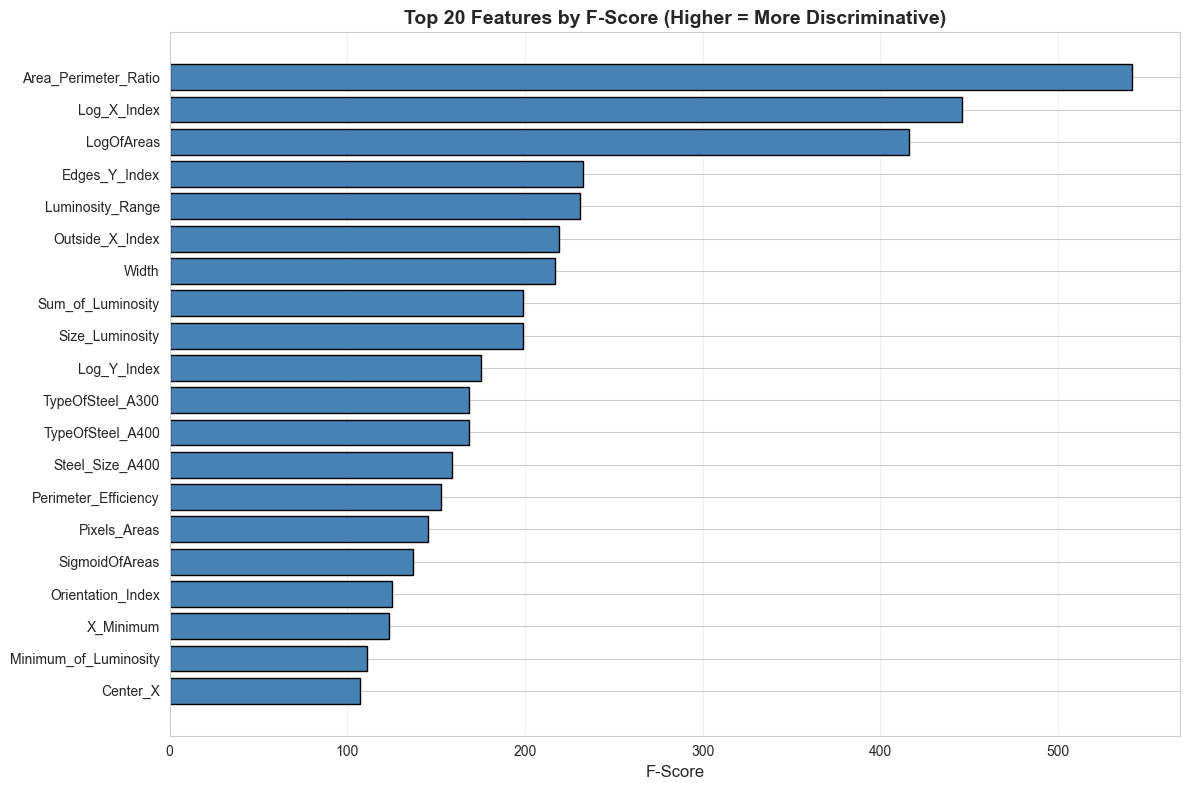

💡 Features with higher F-scores are better at distinguishing fault types


In [12]:
# Visualize top features
plt.figure(figsize=(12, 8))

# Get top 20 features
top_20 = f_scores.head(20)

# Create horizontal bar plot
colors = ['green' if 'new' not in str(feat).lower() else 'blue' 
          for feat in top_20['Feature']]
plt.barh(range(len(top_20)), top_20['F-Score'], color='steelblue', edgecolor='black')
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('F-Score', fontsize=12)
plt.title('Top 20 Features by F-Score (Higher = More Discriminative)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest at top
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("💡 Features with higher F-scores are better at distinguishing fault types")

In [13]:
# ============================================================
# CORRELATION ANALYSIS
# ============================================================

print("🔍 Correlation Analysis of New Features:\n")

# Check correlation of new features with each other
new_features_df = df_eng[all_new_features]
correlation = new_features_df.corr()

# Find highly correlated pairs (|r| > 0.9)
high_corr_pairs = []
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if abs(correlation.iloc[i, j]) > 0.9:
            high_corr_pairs.append({
                'Feature 1': correlation.columns[i],
                'Feature 2': correlation.columns[j],
                'Correlation': correlation.iloc[i, j]
            })

if len(high_corr_pairs) > 0:
    print("⚠️ Highly correlated feature pairs (|r| > 0.9):")
    for pair in high_corr_pairs[:10]:  # Show first 10
        print(f"   {pair['Feature 1']} <-> {pair['Feature 2']}: {pair['Correlation']:.3f}")
    print(f"\n   Consider removing one feature from each pair")
else:
    print("✅ No highly correlated pairs found among new features")

🔍 Correlation Analysis of New Features:

⚠️ Highly correlated feature pairs (|r| > 0.9):
   Height <-> BBox_Area: 0.989
   Height <-> BBox_Perimeter: 0.982
   Height <-> Perimeter_Total: 0.944
   BBox_Area <-> BBox_Perimeter: 0.989
   BBox_Area <-> Perimeter_Total: 0.956
   BBox_Perimeter <-> Perimeter_Total: 0.976
   Pixel_Density <-> Extent: 1.000
   Pixel_Density <-> Solidity: 0.996
   Extent <-> Solidity: 0.996
   Size_Luminosity <-> Steel_Size_A400: 0.966

   Consider removing one feature from each pair


---
## 8. Save Engineered Features

Save the dataset with all engineered features.

In [14]:
# Create processed data directory
import os
processed_dir = '../data/processed'
os.makedirs(processed_dir, exist_ok=True)

# Save the engineered dataset
output_path = f'{processed_dir}/steel_plates_engineered.csv'
df_eng.to_csv(output_path, index=False)
print(f"✅ Saved: {output_path}")

# Save feature names
feature_names_path = f'{processed_dir}/engineered_feature_names.txt'
with open(feature_names_path, 'w') as f:
    for col in all_feature_cols:
        f.write(col + '\n')
print(f"✅ Saved: {feature_names_path}")

# Save new feature names only
new_features_path = f'{processed_dir}/new_feature_names.txt'
with open(new_features_path, 'w') as f:
    for col in all_new_features:
        f.write(col + '\n')
print(f"✅ Saved: {new_features_path}")

print(f"\n📁 All files saved to: {processed_dir}/")

✅ Saved: ../data/processed/steel_plates_engineered.csv
✅ Saved: ../data/processed/engineered_feature_names.txt
✅ Saved: ../data/processed/new_feature_names.txt

📁 All files saved to: ../data/processed/


---
## 9. Summary

### 📊 Feature Engineering Summary

| Category | Features Created | Examples |
|----------|-----------------|----------|
| **Geometric** | 7 | Width, Height, Aspect_Ratio, BBox_Area |
| **Statistical** | 6 | Luminosity_Range, Avg_Luminosity, Pixel_Density |
| **Ratio-based** | 5 | Compactness, Extent, Area_Perimeter_Ratio |
| **Interaction** | 4+ | Size_Luminosity, Shape_Complexity |

### 🎯 Key Insights

1. **Geometric features** capture fault shape and position
2. **Statistical features** capture intensity patterns
3. **Ratio features** are more robust to scale variations
4. **Top features** show strong discrimination ability

### 🚀 Next Steps

1. **Model Training**: Use engineered features
2. **Compare**: Original vs Engineered features
3. **Iterate**: Create more features based on model feedback

---

✅ **Phase 3 (Feature Engineering) Complete!**

Ready for model training! 🎉

In [15]:
# Final Summary
print("="*70)
print("📊 FEATURE ENGINEERING SUMMARY")
print("="*70)

print(f"\n✅ Original features:     {len(feature_cols)}")
print(f"✅ New features created:  {len(all_new_features)}")
print(f"✅ Total features:        {len(all_feature_cols)}")
print(f"\n✅ Dataset saved with all features!")

print("\n📋 New Features Created:")
for i, feat in enumerate(all_new_features, 1):
    print(f"   {i:2}. {feat}")

print("\n" + "="*70)
print("Ready for Model Training! 🚀")
print("="*70)

📊 FEATURE ENGINEERING SUMMARY

✅ Original features:     27
✅ New features created:  23
✅ Total features:        50

✅ Dataset saved with all features!

📋 New Features Created:
    1. Width
    2. Height
    3. Aspect_Ratio
    4. BBox_Area
    5. Center_X
    6. Center_Y
    7. BBox_Perimeter
    8. Luminosity_Range
    9. Avg_Luminosity
   10. Luminosity_Density
   11. Pixel_Density
   12. Perimeter_Total
   13. Perimeter_Efficiency
   14. Area_Perimeter_Ratio
   15. XY_Perimeter_Ratio
   16. Compactness
   17. Extent
   18. Solidity
   19. Size_Luminosity
   20. Position_Score
   21. Shape_Complexity
   22. Steel_Size_A300
   23. Steel_Size_A400

Ready for Model Training! 🚀
